## EDA experiment for Face anti Spoofing

Các tệp đã giải nén: ['sample_submission.csv', 'test_videos', 'train_sample_videos']
Các tệp video tìm thấy: ['C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\aassnaulhq.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\aayfryxljh.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\acazlolrpz.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\adohdulfwb.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\ahjnxtiamx.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\ajiyrjfyzp.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\aktnlyqpah.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\alrtntfxtd.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\aomqqjipcp.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\apedduehoy.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_videos\\apvzjkvnwn.mp4', 'C:\\Users\\ADMIN\\Paper-FAS\\extracted_data\\test_vid

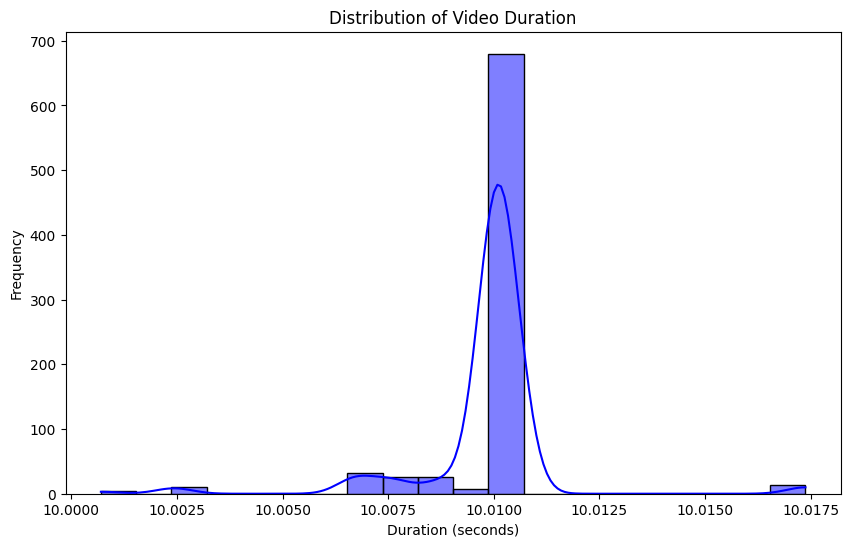

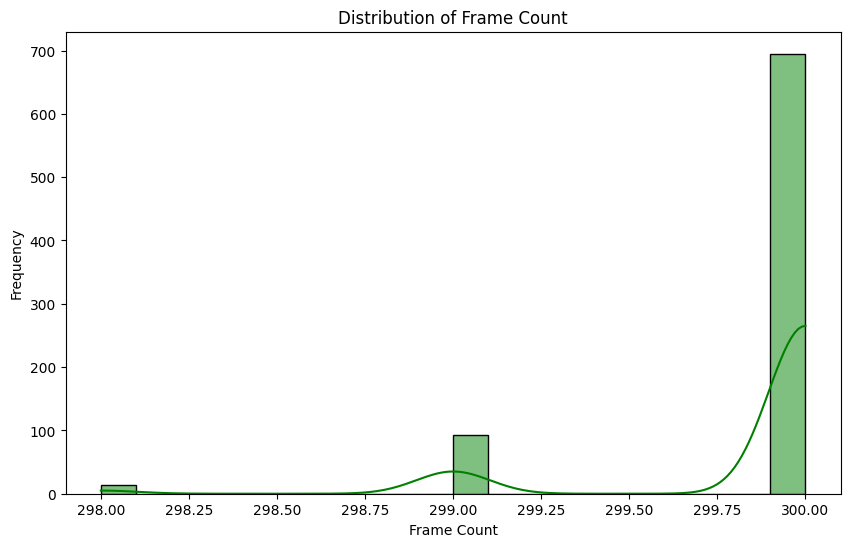

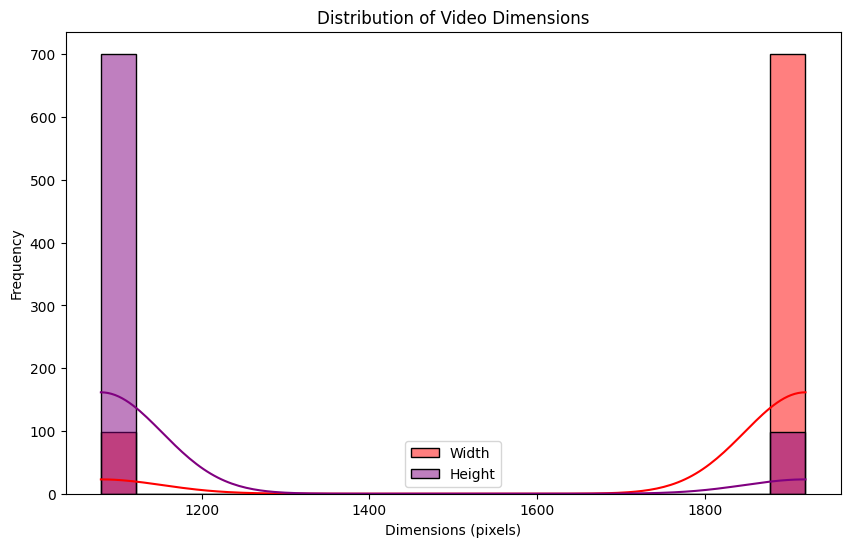


Ví dụ các video:
         video_name   duration  frame_count      fps  width  height
216  oefukgnvel.mp4  10.010010          300  29.9700   1920    1080
423  ahfazfbntc.mp4  10.010010          300  29.9700   1920    1080
243  ptbfnkajyi.mp4  10.010478          300  29.9686   1920    1080
461  atzdznmder.mp4  10.010010          300  29.9700   1920    1080
232  pcoxcmtroa.mp4  10.010377          300  29.9689   1920    1080


In [23]:
import zipfile
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2  # OpenCV để xử lý video

# Đường dẫn tới tệp zip và thư mục giải nén
zip_file_path = r'C:\Users\ADMIN\Paper-FAS\deepfake-detection-challenge.zip'  # Đường dẫn tới tệp zip
extract_folder = r'C:\Users\ADMIN\Paper-FAS\extracted_data'  # Thư mục để giải nén

# Giải nén tệp zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Kiểm tra các tệp đã giải nén
extracted_files = os.listdir(extract_folder)
print(f"Các tệp đã giải nén: {extracted_files}")

# Hàm duyệt qua tất cả các thư mục con và tìm các tệp .mp4
def find_video_files(directory):
    video_files = []
    for root, dirs, files in os.walk(directory):  # Duyệt qua tất cả các thư mục con
        for file in files:
            if file.endswith('.mp4'):
                video_files.append(os.path.join(root, file))  # Thêm đường dẫn đầy đủ của video
    return video_files

# Tìm tất cả các video .mp4 trong thư mục giải nén
video_files = find_video_files(extract_folder)
print(f"Các tệp video tìm thấy: {video_files}")

# Nếu không có tệp video, thông báo lỗi
if len(video_files) == 0:
    print("Không tìm thấy tệp video .mp4 trong thư mục giải nén.")
else:
    # Bước 2: Trích xuất thông tin từ video .mp4
    def get_video_info(video_path):
        cap = cv2.VideoCapture(video_path)
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # Số lượng frame
        fps = cap.get(cv2.CAP_PROP_FPS)  # Tốc độ khung hình (frames per second)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))  # Chiều rộng video
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Chiều cao video
        duration = frame_count / fps if fps > 0 else 0  # Tránh chia cho 0
        cap.release()
        return {'frame_count': frame_count, 'fps': fps, 'width': width, 'height': height, 'duration': duration}

    # Lấy thông tin video từ các tệp .mp4 trong thư mục giải nén
    video_info = []
    for video_path in video_files:
        info = get_video_info(video_path)
        video_info.append({
            'video_name': os.path.basename(video_path),  # Lấy tên video
            'frame_count': info['frame_count'],
            'fps': info['fps'],
            'width': info['width'],
            'height': info['height'],
            'duration': info['duration']  # Thêm cột 'duration'
        })

    # Chuyển thông tin thành DataFrame
    df_video_info = pd.DataFrame(video_info)

    # Kiểm tra các cột trong DataFrame
    print("Các cột trong df_video_info:", df_video_info.columns)

    # In ra vài dòng dữ liệu để kiểm tra thông tin video
    print("Dữ liệu đầu tiên trong DataFrame:")
    print(df_video_info.head())

    # Kiểm tra các giá trị thiếu
    print("Kiểm tra các giá trị thiếu:")
    print(df_video_info.isnull().sum())

    # Bước 3: Phân tích phân phối và trực quan hóa thông tin

    # Vẽ biểu đồ phân phối độ dài video (duration)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_video_info['duration'], kde=True, color='blue', bins=20)
    plt.title('Distribution of Video Duration')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Frequency')
    plt.show()

    # Vẽ biểu đồ phân phối số lượng frame trong video
    plt.figure(figsize=(10, 6))
    sns.histplot(df_video_info['frame_count'], kde=True, color='green', bins=20)
    plt.title('Distribution of Frame Count')
    plt.xlabel('Frame Count')
    plt.ylabel('Frequency')
    plt.show()

    # Vẽ biểu đồ phân phối độ phân giải video (Width and Height)
    plt.figure(figsize=(10, 6))
    sns.histplot(df_video_info['width'], kde=True, color='red', label='Width', bins=20)
    sns.histplot(df_video_info['height'], kde=True, color='purple', label='Height', bins=20)
    plt.legend()
    plt.title('Distribution of Video Dimensions')
    plt.xlabel('Dimensions (pixels)')
    plt.ylabel('Frequency')
    plt.show()

    # Bước 4: Hiển thị ví dụ một số video
    sample_videos = df_video_info.sample(n=5)  # Lấy 5 video ngẫu nhiên
    print("\nVí dụ các video:")
    print(sample_videos[['video_name', 'duration', 'frame_count', 'fps', 'width', 'height']])
